# Decision trees

## Penguins dataset

**Import of the libraries useful for the analysis**

In [1]:
# pandas -> read input file and data manipulation
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)

# numpy -> array manipulations
import numpy as np
np.set_printoptions(suppress=True)

# pandas, matplotlib & seaborn -> plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn -> data processing, models fit, make predictions and analyze the results
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# show sklearn objects in diagram
from sklearn import set_config
set_config(print_changed_only=False, display="diagram")

# warnings -> to silence warnings
from warnings import filterwarnings
filterwarnings("ignore")

**Load the penguins dataset**  
The penguins dataset contains the physical attributes of penguins and their species.

In [2]:
df = pd.read_csv("data/penguins_size.csv", na_values=".")

**Copy of the dataframe**

In [3]:
df_ = df.copy()

**Name of the columns/variables**  
The dataset contains 7 columns: island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex and species

In [4]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

**Shape of the dataframe**  
The dataframe is composed by 344 rows and 7 columns.

In [5]:
df.shape

(344, 7)

**Show 10 random observations**  
We have mixed variables types.

In [6]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
74,Adelie,Torgersen,35.50,17.50,190.00,3700.00,FEMALE
198,Chinstrap,Dream,50.10,17.90,190.00,3400.00,FEMALE
114,Adelie,Biscoe,39.60,20.70,191.00,3900.00,FEMALE
133,Adelie,Dream,37.50,18.50,199.00,4475.00,MALE
260,Gentoo,Biscoe,42.70,13.70,208.00,3950.00,FEMALE
262,Gentoo,Biscoe,45.30,13.70,210.00,4300.00,FEMALE
124,Adelie,Torgersen,35.20,15.90,186.00,3050.00,FEMALE
245,Gentoo,Biscoe,46.10,15.10,215.00,5100.00,MALE
271,Gentoo,Biscoe,48.50,14.10,220.00,5300.00,MALE
291,Gentoo,Biscoe,46.40,15.60,221.00,5000.00,MALE


**Informations about missing values and variable types**  
We have some variables with missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Count of the missing values**  
The missing values are very few considering the size of the dataset.

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**Check the rows with missing values**  
There is no evidence of a pattern on the missing values.

In [9]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.10,18.10,193.00,3475.00,NaN
9,Adelie,Torgersen,42.00,20.20,190.00,4250.00,NaN
10,Adelie,Torgersen,37.80,17.10,186.00,3300.00,NaN
11,Adelie,Torgersen,37.80,17.30,180.00,3700.00,NaN
47,Adelie,Dream,37.50,18.90,179.00,2975.00,NaN
246,Gentoo,Biscoe,44.50,14.30,216.00,4100.00,NaN
286,Gentoo,Biscoe,46.20,14.40,214.00,4650.00,NaN
324,Gentoo,Biscoe,47.30,13.80,216.00,4725.00,NaN
336,Gentoo,Biscoe,44.50,15.70,217.00,4875.00,NaN


**Drop the rows with missing values**

In [10]:
df.dropna(inplace=True)

**Statistical informations about numerical variables**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60
culmen_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00


**We use a pairplot to have a visual overview of the relationship between the variables**

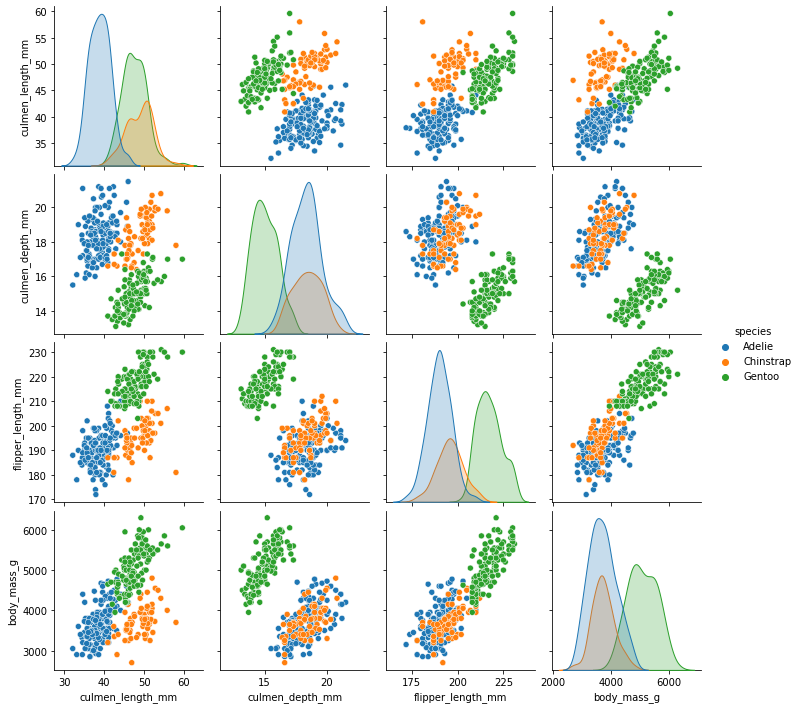

In [12]:
sns.pairplot(data=df, hue="species")
plt.show()

**Boxplots of the numeric features discriminating by species**

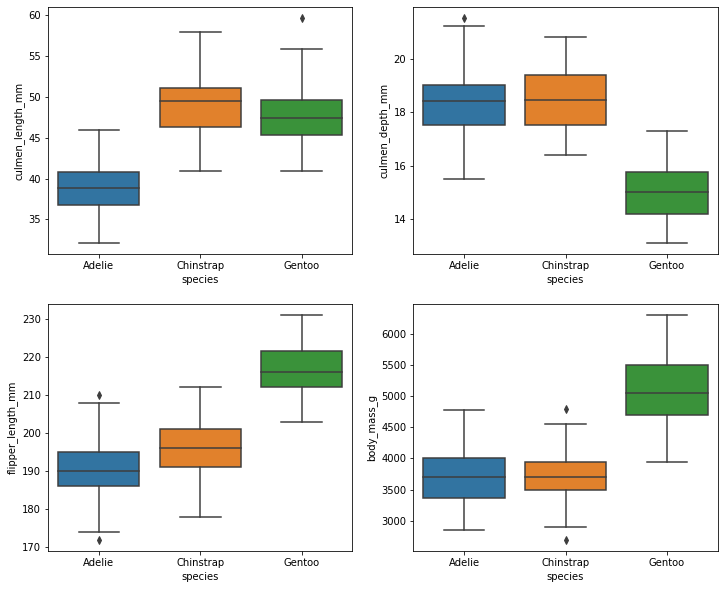

In [13]:
fig = plt.figure(figsize=(12, 10))
axes = fig.subplots(nrows=2, ncols=2)
for ax, column in zip(axes.flat, df.columns[2:-1]):
    sns.boxplot(x="species", y=column, data=df, ax=ax)

**Barplots of the categorical features discriminating by species**  
As we can see from the barplot of the feature *island* the species Gentoo lives only in the Biscoe island and the Chinstrap species lives only in the Dream island. The *sex* doesn't show significative differences among species.

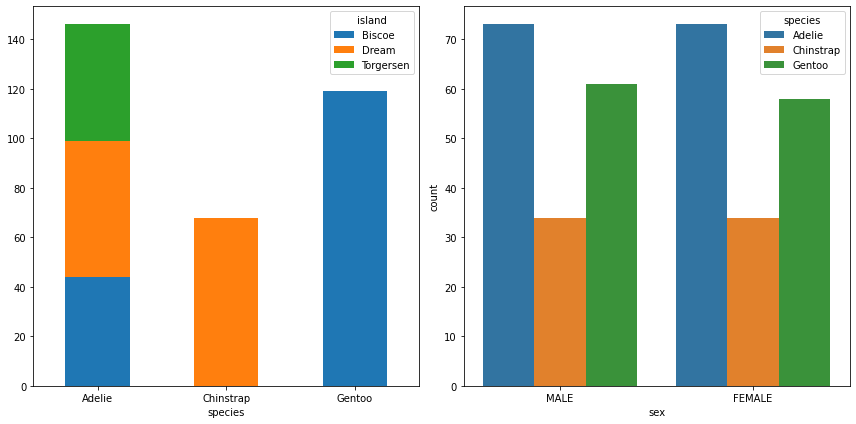

In [14]:
# prepare data for island stacked plot
df_plot = df.groupby(['island', 'species']) \
            .size() \
            .reset_index() \
            .pivot(columns='island', index='species', values=0)

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(nrows=1, ncols=2)
df_plot.plot(kind="bar", stacked=True, rot=0, ax=ax[0])
sns.countplot(x="sex", hue="species", data=df, ax=ax[1])
plt.tight_layout()
plt.show()

### Classification analysis  
As we can see from the barplot, the categories of the response variable are not perfectly balanced.

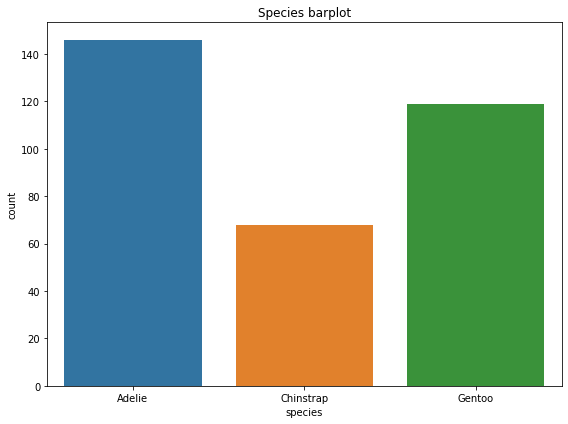

In [15]:
plt.figure(figsize=(8, 6))
plt.title(label="Species barplot")
sns.countplot(x="species", data=df)
plt.tight_layout()
plt.show()

**Definition of the X and y variables**  
We use backwards selection approach considering all the features to make the decision tree model.

In [16]:
X = df.drop(columns="species")
y = df["species"]

**Split the dataset into training and test set**  
The parameter ```stratify=y``` allows to preserve the original structure of the data in the training and test set.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

**Pre-processing of the data**  
To carry out the pre-processing of the data we carry out the following operations:
* encode the nominal variables *island* and *sex*
* encode the target variable (*species*)

**Processing of the features**  
We process the features using the ```ColumnTransformer``` object that contains the ```OneHotEncoder``` that applies the one hot encoding operation to the selected columns. Setting the parameter ```remainder="passthrough"``` the column not processed will be returned without any changes. We are not scaling our data because the decision trees are not sensitive to the scale of the data.

In [18]:
ct = ColumnTransformer(transformers=[
    ("ohe", OneHotEncoder(drop="first", sparse=False, dtype=int), ["island", "sex"])
], remainder="passthrough")
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'int'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['island', 'sex'])],
                  verbose=False)

****Fit and transform of the transformer to the data****

In [19]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

**Convert the species categories to numeric**  
We use the ```LabelEncoder``` class object to encode the response variable.  
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [20]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

**Transform the label data**

In [21]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

### Decision trees
The decision trees are a family of algorithms that can be used both for regression and classification tasks and are one of the most popular machine learning algorithms given their intelligibility and simplicity. 

<img src=https://www.tutorialandexample.com/wp-content/uploads/2019/10/Decision-Trees-Root-Node.png width="650">

A tree is built by splitting the input data, constituting the root node of the tree, into subsets which constitute the successor children. The splitting is based on a set of splitting rules based on the working task. This process is repeated on each derived subset in a recursive manner called **recursive partitioning**. The recursion is completed when the subset at a node has all the same values of the target variable, or when splitting no longer adds value to the predictions. This process of **top-down induction** of decision trees is an example of a **greedy algorithm**, and it is by far the most common strategy for learning decision trees from data.

<img src=https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree-levels.png>

Based on the type of task we distinguish between:
* **classification trees**: the target variable can take a discrete set of values
* **regression trees**: when the target variable can take continuous values

In both cases the model try to find most homogeneous branches, or branches having groups with similar responses.

Since the decision tree algorithms are recursive, they split the whole features space, returning very big trees that are very difficult to read, and this can lead to great performances on the training set but often very poor on the test set (bad generalization on new data). Given this feature of the model, it's necessary to control the construction of the tree to prevent it from becoming too deep. We can prevent this situation following these strategies:
* building a smaller tree
* pruning the "complete" tree

Both strategies are valid. The most important thing is to be careful not to build too small trees, that can be very weak on prediction tasks.

### Classification trees  

**Definition of the model and fit on the training data**  
For classification trees we can use two differents split criteria:
* Gini impurity index
\begin{equation} Gini=1-\sum_{i=1}^c (p_i)^2\end{equation}


* Entropy variation
\begin{equation} Entropy=\sum_{i=1}^c -p_i*log_2({p_i})\end{equation}

where $p_i$ is the probability of an object being classified to a particular class.

These criteria tipically lead to similar trees, but the Gini index is preferred because it's computationally more efficient to compute than entropy (due to the lack of the log), which could make code negligibly more efficient.

**Definition of the model and fit to the data**  
As we can see from the diagram, decision trees have many parameters that controls the contruction of the model during the training phase. In this case we build a model with default values, that split the whole feature space using the Gini criterion.

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [22]:
dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

**With the method ```get_depth()``` is possibile to see the depth of the fitted tree**  
In this case the fitted tree has a depth of 5.

In [23]:
dtc.get_depth()

5

**Plot of the tree**  
One of the most appreciated features of decision trees is the ability to graphically display the obtained decision tree. In scikit-learn, this is possible using the function ```plot_tree```.

Definition of the function:
```python
plot_tree(
    decision_tree,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate='deprecated',
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
```

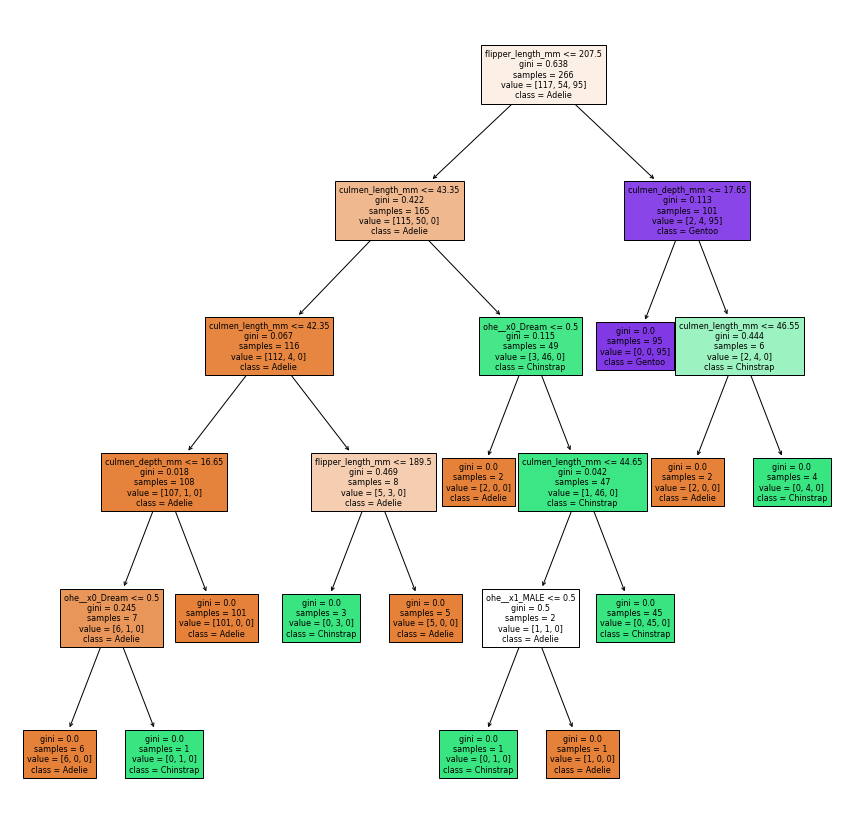

In [24]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=dtc, 
          feature_names=ct.get_feature_names(), 
          class_names=le.classes_, 
          filled=True, fontsize=8)
plt.show()

**Manual computation of the Gini impurity and the Entropy variation indexes**  
We can use the formula described above to compute the Gini and Entropy indexes for a particular node. Let's try to compute this indexes with the first split.

Description of the first split:
```
flipper_length_mm <= 207.5
gini = 0.638
samples = 266
value = [117, 54, 95]
class = Adelie
```

In [25]:
gini = 1 - ((117/266)**2 + (54/266)**2 + (95/266)**2)
print(f"The Gini impurity index of the first node is {gini}")

The Gini impurity index of the first node is 0.6377692351178699


In [26]:
entropy = (117/266) * np.log2(117/266) - (54/266) * np.log2(54/266) - (95/266) * np.log2(95/266)
print(f"The entropy variation of the first node is {entropy}")

The entropy variation of the first node is 0.47632143691364304


**Show the tree in text format**  
With the function ```export_text``` we can export the tree in text format.

In [27]:
text_tree = export_text(decision_tree=dtc, feature_names=ct.get_feature_names())
print(text_tree)

|--- flipper_length_mm <= 207.50
|   |--- culmen_length_mm <= 43.35
|   |   |--- culmen_length_mm <= 42.35
|   |   |   |--- culmen_depth_mm <= 16.65
|   |   |   |   |--- ohe__x0_Dream <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ohe__x0_Dream >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- culmen_depth_mm >  16.65
|   |   |   |   |--- class: 0
|   |   |--- culmen_length_mm >  42.35
|   |   |   |--- flipper_length_mm <= 189.50
|   |   |   |   |--- class: 1
|   |   |   |--- flipper_length_mm >  189.50
|   |   |   |   |--- class: 0
|   |--- culmen_length_mm >  43.35
|   |   |--- ohe__x0_Dream <= 0.50
|   |   |   |--- class: 0
|   |   |--- ohe__x0_Dream >  0.50
|   |   |   |--- culmen_length_mm <= 44.65
|   |   |   |   |--- ohe__x1_MALE <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ohe__x1_MALE >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- culmen_length_mm >  44.65
|   |   |   |   |--- class: 1
|--- flipper_length_mm >  207.50
|   

**Save the text tree to file**  
If we want, we can save the tree in text format to file txt.

In [28]:
with open("text_tree.txt", "w") as file:
    file.write(text_tree)

**Decision tree feature importances**  
The family of decision trees algorithms allow us to show the feature importances, that are the equivalent to the coefficients of the linear/logistic regression models. The feature importance is computed considering how much the feature contributed to build the tree during the training phase.  
In this case, are considered the features that have contributed to decrease the impurity Gini index for each split, and typically the most important variables are those that contributed to the first splits.

**Get the feature importances**  
We can access to the feature importances by calling the attribute ```feature_importances_``` of the model fitted.

In [29]:
dtc.feature_importances_

array([0.03176893, 0.        , 0.00589461, 0.36521181, 0.05332304,
       0.5438016 , 0.        ])

**Definition of the function to plot the feature importances normalized**

In [30]:
def feature_importances_plot(model, labels, **kwargs):
    """
    Compute normalized feature importance from model
    and return the data or show plot.
    
    Parameters
    ----------
    model : any
        scikit-learn model
    labels : list | np.array
        list of feature labels
    
    Returns
    -------
    AxesSubplot
    """
    feature_importances = model.feature_importances_
    feature_importances = 100 * (feature_importances / feature_importances.max())
    df = pd.DataFrame(data={"feature_importances": feature_importances}, index=labels)
    df.sort_values(by="feature_importances", inplace=True)
    return df.plot(kind="barh", figsize=(8, 10), title=f"Feature importances", legend=None, **kwargs)

**Call the function to plot the feature importances of the model**  
As we can see from the results, the features *flipper_length_mm* and *culmen_length_mm* are the most important features by far.

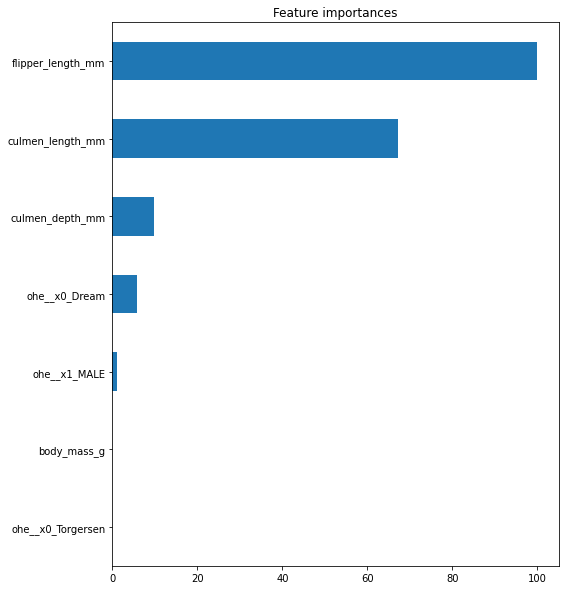

In [31]:
feature_importances_plot(model=dtc, labels=ct.get_feature_names())
plt.show()

**Computing probabilities for each species category**  
Just like the logistic regression model, with the decision trees we can compute the probabilities associated to every prediction. As we can see from the probabilities returned, the model looks very confident about the class predicted on the test set.

In [32]:
y_pred_proba = dtc.predict_proba(X_test)

print(y_pred_proba)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


**Compute the predictions**

In [33]:
y_pred = dtc.predict(X_test)

print(y_pred)

[2 1 0 2 2 2 1 0 0 2 1 0 0 1 1 0 1 0 1 2 1 2 0 0 2 0 0 0 2 1 2 0 1 0 0 0 2
 2 0 1 0 2 0 2 1 0 2 1 2 1 2 0 1 0 2 0 0 1 0 2 0 2 2 0 2 1 0]


**Compute the accuracy of the model**  
With the decision tree model we obtained a ~92% of accuracy.

In [34]:
dtc.score(X_test, y_test)

0.9253731343283582

**Plot the confusion matrix**

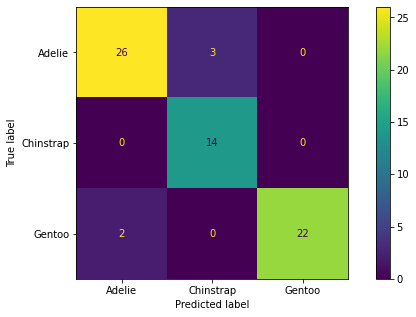

In [35]:
labels = le.classes_

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
plot_confusion_matrix(estimator=dtc, X=X_test, y_true=y_test, display_labels=labels, ax=ax)
plt.show()

**Prune the tree**  
Cost complexity pruning provides an option to control the size of a tree. In ```DecisionTreeClassifier```, this pruning technique is parameterized by the cost complexity parameter, ```ccp_alpha```. Greater values of ```ccp_alpha``` increase the number of nodes pruned.  
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.

**Find the best value of ccp_alpha**  
The method ```cost_complexity_pruning_path``` returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [36]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

**Fit the model for the values of ccp_alpha**  
We fit the decision tree models with the different values of ccp_alpha and store the fitted models to a list.

In [37]:
dtcs = []

for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    dtcs.append(dtc)

# show the first model on the list
dtcs[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

**Compute the scores on the training and test set**  
As we can see from the results, we got the best test score for a value of ccp_alpha=0.01002506

In [38]:
train_scores = [dtc.score(X_train, y_train) for dtc in dtcs]
test_scores = [dtc.score(X_test, y_test) for dtc in dtcs]

print(f"ccp_alphas   training   test")
print(np.c_[ccp_alphas, train_scores, test_scores])

ccp_alphas   training   test
[[0.         1.         0.92537313]
 [0.00367941 0.9962406  0.92537313]
 [0.00372459 0.9924812  0.97014925]
 [0.01002506 0.98496241 0.97014925]
 [0.01079447 0.97368421 0.95522388]
 [0.01381656 0.96616541 0.94029851]
 [0.0330033  0.95112782 0.94029851]
 [0.21180518 0.78947368 0.76119403]
 [0.33272219 0.43984962 0.43283582]]


**Show the accuracy score for the values of ccp_alpha**

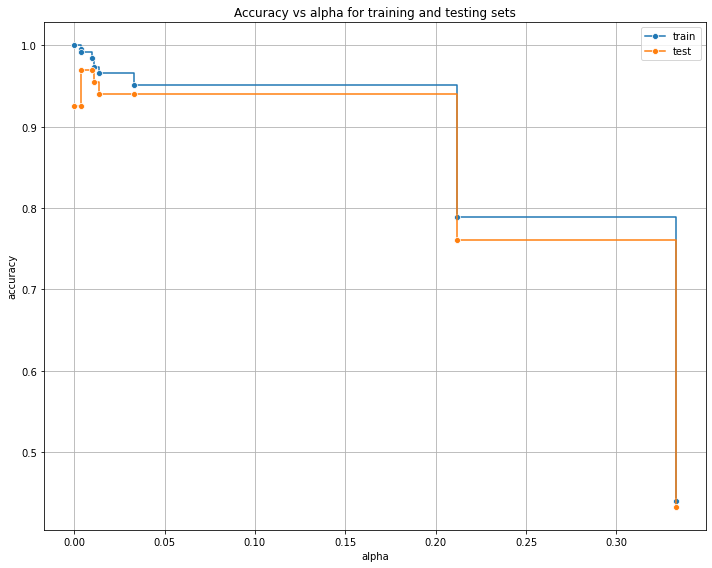

In [39]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=ccp_alphas, y=train_scores, marker='o', label="train", drawstyle="steps-post")
sns.lineplot(x=ccp_alphas, y=test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.grid()
plt.tight_layout()
plt.show()

**Fit of the model with the chosen ccp_alpha value**

In [40]:
dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01002506)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01002506, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

**Show the depth of the new model**  
Applying the pruning, we got a tree with depth 4.

In [41]:
dtc.get_depth()

4

**Fit a Decision tree with all the features**  
As we can see from the plotted tree, with this tree we don't have used some features, so we could remove them from the model.

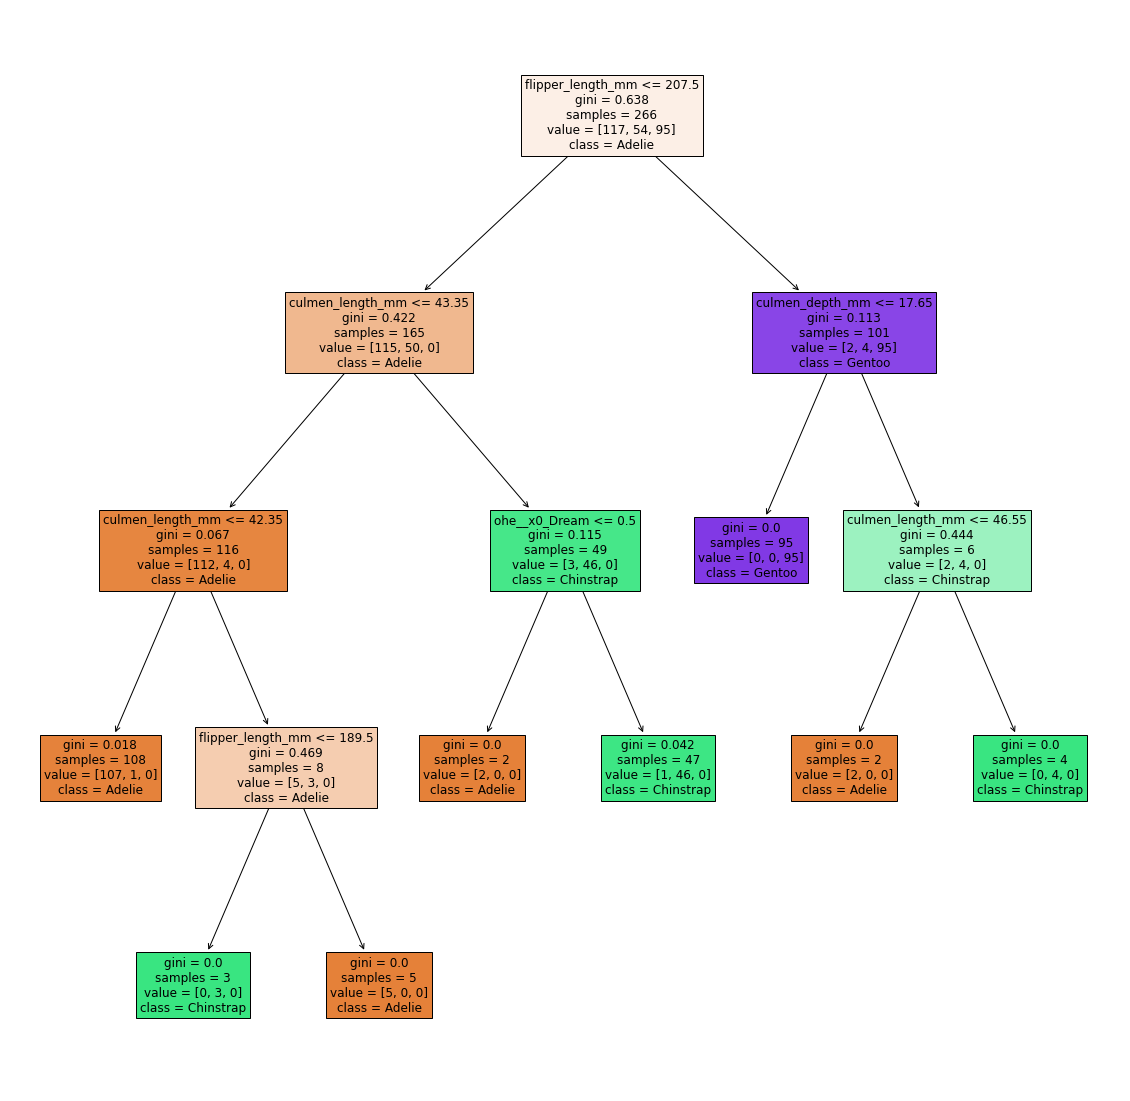

In [42]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=dtc, 
          feature_names=ct.get_feature_names(), 
          class_names=le.classes_, 
          filled=True, fontsize=12)
plt.show()

**Compute the accuracy of the model**  
With a simpler model we obtained a ~97% of accuracy, a bit better than the complete model.

In [43]:
dtc.score(X_test, y_test)

0.9701492537313433

**Plot the confusion matrix**

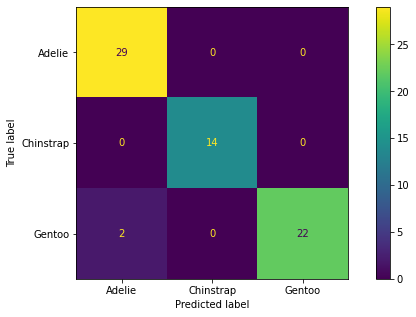

In [44]:
labels = le.classes_

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
plot_confusion_matrix(estimator=dtc, X=X_test, y_true=y_test, display_labels=labels, ax=ax)
plt.show()

### Regression trees  
The regression trees works in the same way as classification trees, with the only difference that they must use the mean squared error as split criteria for each node.
\begin{equation} MSE(y,\hat{y})=\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 \end{equation}
It's also possible to use the mean absolute error (MAE) as split criteria, which minimizes the L1 loss using the median of each terminal node. The use of this split criteria usually can take a long time for the training phase, so it's not recommended.

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

**Load the auto MPG dataset**

In [45]:
df = pd.read_csv("data/auto_mpg.csv", na_values="?")

**Definition of the X and y variables**  
In this case, we use only the variable *weight* as predictor for *mpg*.

In [46]:
X = df[["weight"]].values
y = df["mpg"].values

**Fit the models to the data**  
We fit the decision tree regressors with different depth values in order to compare the obtained regression lines.

In [47]:
dtr_predictions = {}

for depth in [1, 3, 5, None]:
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dtr.fit(X=X, y=y)
    dtr_predictions[dtr.get_depth()] = dtr.predict(X)
    
df_predictions = pd.DataFrame(dtr_predictions)
df_predictions

,1,3,5,18
0,17.84,19.24,17.93,18.00
1,17.84,15.50,16.57,15.00
2,17.84,19.24,17.93,18.00
3,17.84,19.24,17.93,16.00
4,17.84,19.24,17.93,17.00
...,...,...,...,...
393,17.84,22.95,22.80,27.00
394,29.48,31.21,33.47,33.83
395,29.48,27.52,26.72,32.00
396,29.48,25.92,26.00,28.00


**Plot of the regression lines**  
As can be seen from the graph, for short trees the line tends to be linear, while for deeper trees the regression line tends to be more jagged.

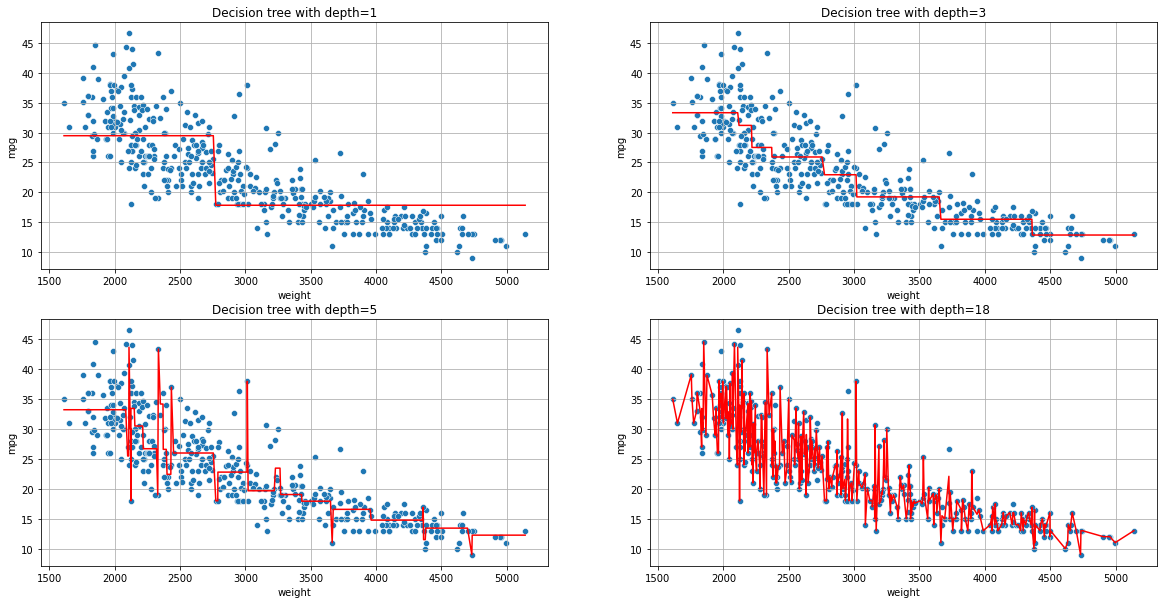

In [48]:
fig = plt.figure(figsize=(20, 10))
axes = fig.subplots(nrows=2, ncols=2)
for ax, column in zip(axes.flat, df_predictions.columns):
    sns.scatterplot(x="weight", y="mpg", data=df, ax=ax)
    sns.lineplot(x=df["weight"], y=df_predictions[column], color="red", ax=ax)
    ax.set_title(f"Decision tree with depth={column}")
    ax.grid()

### <font color= "blue"> Decision tree models </font>
- **supervised model**: the data must have the target variable
- **non-parametric model**: don't make any assumption about the shape of the function

#### <font color= "green"> Pros: </font>
* Can be used for regression and classification problems
* Can interpret linear and non linear relationships
* Easy to understand and interpret
* Robust against outliers

#### <font color= "red"> Contros: </font>
* Many hyperparameters to optimize
* Tends to overfit/underfit basing on the depth of the tree
* They are not robust to changes on the data

**Use when**: we want to study a phenomenon with a non-parametric model and see the decision path that lead to the result.